# 使用（1-10-1）的全连接神经网络，做线性回归

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


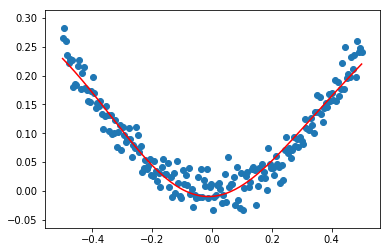

0.0004782518


In [8]:
#样本集合（x_data,y_data），使用numpy生成200个随机点，x_data和y_data都是（200，1）的数组
x_data = np.linspace(-0.5, 0.5, 200).reshape(200,1)
#正态分布（0，0.02）产生噪声
noise = np.random.normal(0, 0.02, x_data.shape)
#使用噪声，产生误差，使样本点分布不均匀
y_data = np.square(x_data) + noise


#定义两个placeholder（占位符），传参用
x = tf.placeholder(tf.float32, [None,1])#定义形状，行数不定，列数为1 
y = tf.placeholder(tf.float32, [None,1])

#-------------------------------------------------------------------------------------------创建神经网络
#创建tensor表示中间层L1（第一个中间层），10个神经元
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))#1代表1个输入，10代表10个输出
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_puls_b_L1 = tf.matmul(x, Weights_L1) + biases_L1#矩阵乘法，求带权输入
#使用tanh作为激活函数
L1 = tf.nn.tanh(Wx_puls_b_L1)

#创建tensor表示输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))#输出层只有一个神经元，接受10个输入产生1个输出
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_puls_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_puls_b_L2)
#-------------------------------------------------------------------------------------------创建神经网络

#定义代价函数，二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法，作为优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
#使用优化器，最小化代价函数
train = optimizer.minimize(loss)

with tf.Session() as sess:
    #初始化全局变量
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train, feed_dict={x:x_data, y:y_data})
    
    #获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r')
    plt.show()
    print(sess.run(loss,feed_dict={x:x_data, y:y_data}))

样本是以行排列的
中间的层就按输入和输出来定义